# LISS1047 - Fluid dynamics in theory and practice

This notebook is to explore mixing properties of various simple dynamical systems, which operate along the basic fluid kinematic principle of *alternating shears in transverse directions*. To execute a code block, use *Shift-enter*. Several code blocks just need to be executed once, and others can have parameters changed and should be run multiple times to study how different aspects affect mixing performance and measurement.

In [31]:
# This block loads a couple of external libraries we need

import numpy as np
import matplotlib.pyplot as plt

We will look at several different dynamical systems. All of these are defined on the $2$-torus, and so we take both variables $x$ and $y$ modulo 1 at all times.

1. The Baker's Map, given by ...

2. A simple horizontal shear, given by $(x,y) \to (x+y,y)$

3. The Cat Map, given by $(x, y) \to (x+y, y+2y)$

4. The Cerbelli-Giona Map, given by ...

5. The Taylor-Chirikov Standard Map, given by $(x, y) \to (x+K\sin(2\pi y)/2\pi), y+x+K*\sin(2\pi y)/2\pi )$

In [32]:
# This block defines several different simple dynamical systems (discrete time maps defined on the 2-torus), discussed above.

#cat = lambda x,y: np.array([(x+y)%1,(x+2*y)%1])

cat = lambda x,y: np.array([(2*x-y)%1,(-x+y)%1])

#Hshear = lambda x,y: np.array([(x+y)%1,y%1])

Hshear = lambda x,y: np.array([(x-y)%1,y%1])

# Chrikov-Taylor standard map, parameter K
#standard = lambda x,y: np.array([(x+K*np.sin(2*np.pi*y)/(2*np.pi))%1,(x+K*np.sin(2*np.pi*y)/(2*np.pi) + y)%1])
standard = lambda x,y: np.array([(x-K*np.sin(2*np.pi*(y-x))/(2*np.pi))%1,(y-x)%1])

# Bakers Map

#baker = lambda x, y: np.array([(2*x)%1,y/2+(2*np.round(x))])

baker = lambda x, y: np.array([(x+(np.round(y)))/2,2*(y-np.round(y)/2)])

# Cerbelli-Giona

cg = lambda x, y: np.array([(x+np.round(y)+(1-2*np.round(y))*2*y)%1,(y+x+np.round(y)+(1-2*np.round(y))*2*y)%1])

# add other maps, like standard map, cerbelli-giona, double tent with perturbations...

In [33]:
# This defines an initial concentration, in which the left and right halves of the domain are coloured differently.
def c(x,y):
    X = 2*np.round(x)-1
    return X

In [34]:
# Propagates a map forward a single iteration

def forward(n,res,f):
    
    nx, ny = res, res
    x = np.arange(0,1,1/nx)
    y = np.arange(0,1,1/ny)
    xx, yy = np.meshgrid(x,y)
    for k in range(n):
        xx, yy = f(xx,yy)
    den = c(xx,yy)
    plt.imshow(den,origin='lower')

    return None

In [35]:
def snapshot(ns,res,f):
    # Side by side `forward' function
    # ns is a list of integers [n1, n2, ...]
    # will plot initial c(x,y) and evolution under f^n1, f^n2, ...
    fig, ax = plt.subplots(1,len(ns)+1)
    nx, ny = res, res
    x = np.arange(0,1,1/nx)
    y = np.arange(0,1,1/ny)   
    xx, yy = np.meshgrid(x,y)
    den = c(xx,yy)
    ax[0].imshow(den,origin='lower')
    for k in range(max(ns)):
        xx, yy = f(xx,yy)
        if k+1 in ns:
            den = c(xx,yy)
            ind = ns.index(k+1)+1
            ax[ind].imshow(den,origin='lower')

    return None

In [36]:
# Computes the variance (in the sense of Danckwerts' *intensity of segregation*) of a concentration field

def variance(n,res,res2,f):
    
    nx, ny = res, res
    x = np.arange(0,1,1/nx)
    y = np.arange(0,1,1/ny)   
    xx, yy = np.meshgrid(x,y)
    for k in range(n):
        xx, yy = f(xx,yy)
    den = c(xx,yy)
    #plt.imshow(den,origin='lower')
    
    var = np.zeros((res2,res2))
    var2 = np.zeros((res2,res2))
    varres = res//res2
    for i in range(res2):
        for j in range(res2):
            var[i][j] = np.sum(den[i*varres:(i+1)*varres,j*varres:(j+1)*varres])/varres**2
            var2[i][j] = var[i][j]**2
            var3 = np.sum(var2)/res2**2
    return var3

In [37]:
# This gives a picture of speed of mixing by computing variance for several iterates, plotting these in different forms

def mix(n,res,res2,f):
    variances = []
    for i in range(n):
        variances.append(variance(i,res,res2,f))
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    fig.subplots_adjust(hspace=.5)
    ax1.plot(variances,'-o')
    ax1.set_xlabel('Linear time')
    ax1.set_ylabel('Linear variance')
    ax2.set_xlabel('Linear time')
    ax2.set_ylabel('Log variance')
    ax2.semilogy(variances,'-o')
    ax3.loglog(variances,'-o')
    ax3.set_xlabel('Log time')
    ax3.set_ylabel('Log variance')
    return None

We illustrate these functions using the Baker's map, which is an exponentially mixing dynamical system. The first function is **forward**, which propagates the initial concentration forward. We can (and must) choose 3 parameters: the first is the number of iterates, the second the resolution (we use an $n\times n$ grid), and the third is the name of the dynamical system.

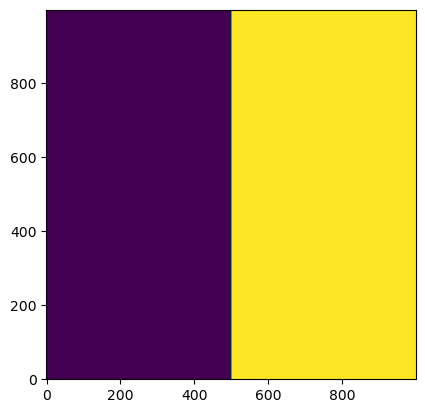

In [38]:
# forward(n,M,map_name)
# n is number of iterates, M is resolution, map_name is the dynamical system in question
forward(0,1000,baker)

The **snapshot** function gives us several iterates in one go. The function plots the initial concentration, and then the images corresponding to iterates $n_1, n_2, n_3, \ldots$, given an input list *[n1, n2, n3,...]*. Note these need not be sequential, but the larger they are, the longer the code will take.

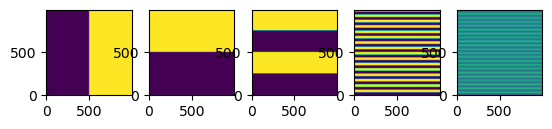

In [39]:
# snapshot([n1, n2, n3,...],M,map_name)
# the first argument is a list containing numbers of iterates, M is resolution, map_name is the dynamical system in question
snapshot([1,2,5,7],1000,baker)

The **variance** function computes the variance of a concentration field after $n$ iterates of mixing. It does so by placing an $q \times q$ grid on the field and computing the variance within each gridbox, and then taking a normalised average. This is essentially Danckwert's *intensity of segregation*, and has value 0 for something completely mixed, and 1 for something completely segregated (unmixed). Note that the value of $q$ is crucial here - if $q$ is equal to the resolution of the concentration field, any pattern will be unmixed at this scale. Similarly, if $q=1$, any pattern will be completely mixed. The choice of $q$ depends on what scale we are most interested in.

In [46]:
# variance(n,M,q,map_name)
# n is number of iterates, M is resolution, q is grid-resolution
variance(2,1000,10,baker)

0.7953368007999999

To get an idea of rate of mixing, we can plot the intensity of segregation for several iterates, and see how quickly the variance decreases. If the map mixes completely, the variance will eventually decay to zero, but if there are unmixed islands the variance will stop decaying at some positive threshold. The speed of mixing might be exponential (a straight line on a log-linear plot), algebraic (a straight line on a log-log plot), or linear. Again, the resolution of the $q$-grid might affect this. The Baker's map should mix at exponential rate.

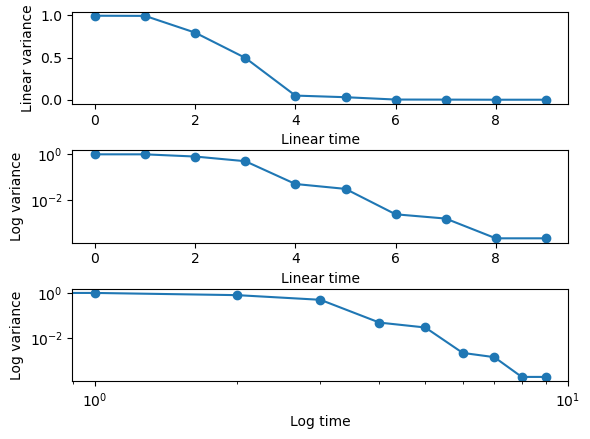

In [27]:
# mix(n,M,q,map_name)
# n is total number of iterates, M is resolution, q is grid resolution
mix(10,1000,10,baker)

Compare this behaviour to a horizontal shear map. 

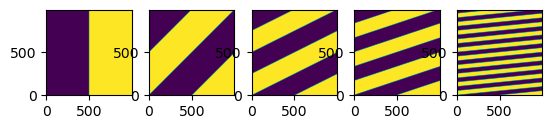

In [28]:
snapshot([1,2,3,10],1000,Hshear)

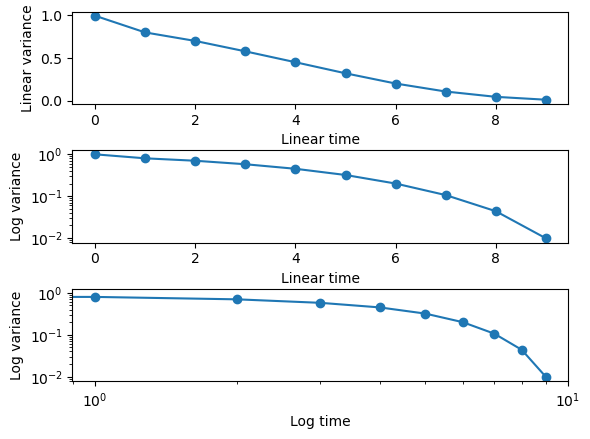

In [29]:
mix(10,1000,10,Hshear)

Try the same sort of experiments for three more maps: the **Cat Map**, the **Cerbelli-Giona Map**, and the **Taylor-Chirikov Standard Map**. The Standard Map has a parameter $K$ that you can change, with $K>0$. Note that for $K=0$ this map is just a vertical shear, and the initial concentration field is unchanged. As $K$ increase, the nonlinearity in the map grows, and the mixing improves.

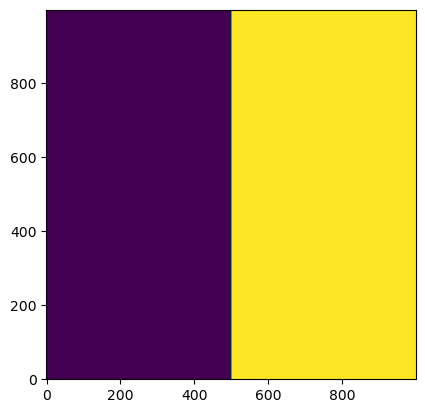

In [32]:
K=2.0
forward(0,1000,standard)

Add new cells to this notebook by clicking the **+** symbol above, and try to find and quantify good mixing behaviour in these maps. 